The DataFrame has 100000 rows.
The DataFrame has 18 columns.
obj_ID               False
Ascension Angle      False
Declination Angle    False
Ultraviolet Light    False
Green Light          False
Red Light            False
Infrared Light       False
z                    False
run_ID               False
rerun_ID             False
cam_col              False
field_ID             False
spec_obj_ID          False
class                False
redshift             False
plate                False
MJD                  False
fiber_ID             False
dtype: bool
obj_ID               False
Ascension Angle      False
Declination Angle    False
Ultraviolet Light    False
Green Light          False
Red Light            False
Infrared Light       False
z                    False
run_ID               False
rerun_ID             False
cam_col              False
field_ID             False
spec_obj_ID          False
class                False
redshift             False
plate                False
MJD      

/var/folders/t5/qwkctqts76n4y0jsv3_kxd140000gn/T/ipykernel_21277/427013604.py:60: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='class', y='scaled_redshift', palette='viridis')


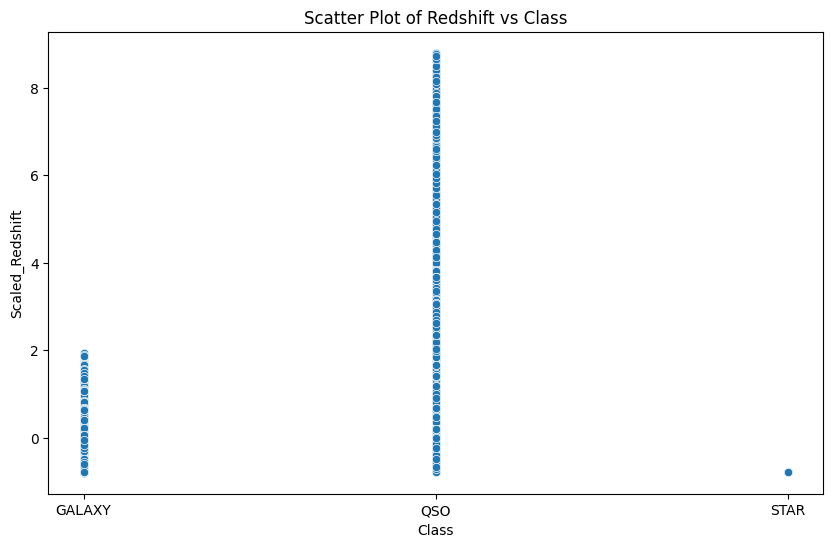

SVM Model (Kernel: linear, C: 1.0)
SVM Accuracy: 0.94305


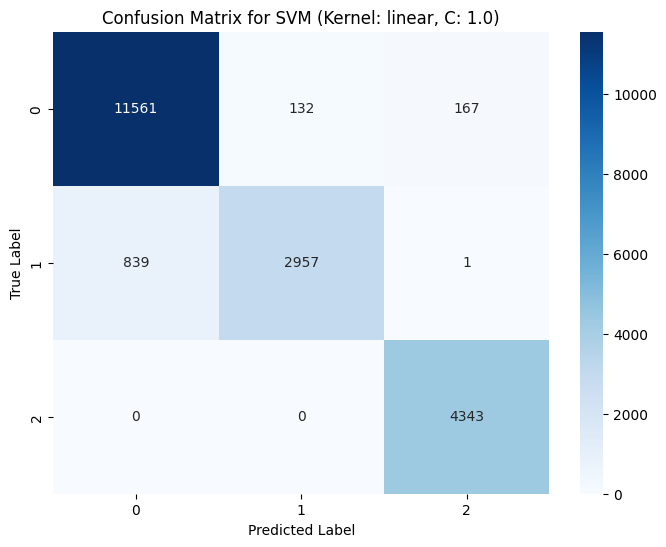

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.93      0.97      0.95     11860
         QSO       0.96      0.78      0.86      3797
        STAR       0.96      1.00      0.98      4343

    accuracy                           0.94     20000
   macro avg       0.95      0.92      0.93     20000
weighted avg       0.94      0.94      0.94     20000


SVM Model (Kernel: rbf, C: 1.0)
SVM Accuracy: 0.94395


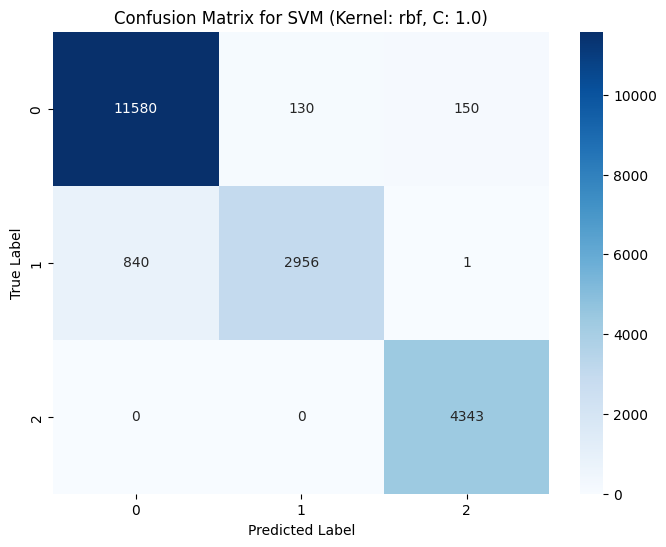

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.93      0.98      0.95     11860
         QSO       0.96      0.78      0.86      3797
        STAR       0.97      1.00      0.98      4343

    accuracy                           0.94     20000
   macro avg       0.95      0.92      0.93     20000
weighted avg       0.94      0.94      0.94     20000


SVM Model (Kernel: poly, C: 1.0)
SVM Accuracy: 0.9408


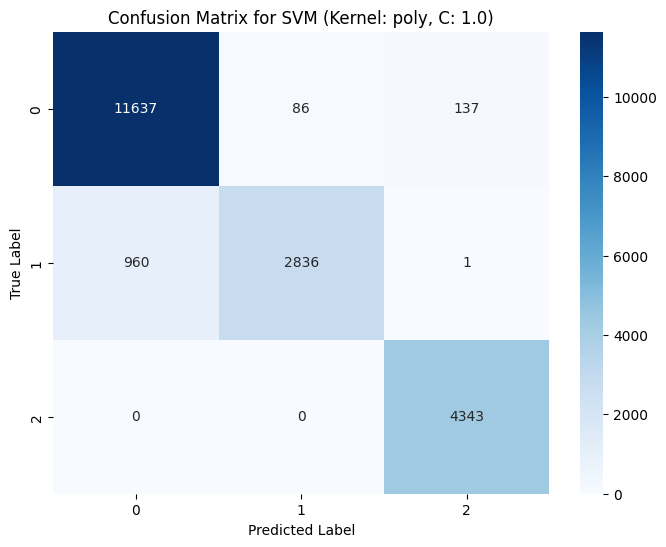

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.92      0.98      0.95     11860
         QSO       0.97      0.75      0.84      3797
        STAR       0.97      1.00      0.98      4343

    accuracy                           0.94     20000
   macro avg       0.95      0.91      0.93     20000
weighted avg       0.94      0.94      0.94     20000




In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import SVC

def plt_property(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

df = pd.read_csv("/Users/sebastianchan/Downloads/Intro-to-AI-Group-5-main/star_classification.csv", na_values=['NA', '?'])

row_count = len(df.axes[0])
cols_count = len(df.axes[1])
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {cols_count} columns.')

df = df.rename(columns={'g': 'Green Light', 'u': 'Ultraviolet Light', 'r': 'Red Light', 'i': 'Infrared Light', 'delta': 'Declination Angle', 'alpha': 'Ascension Angle'})

print(df.isnull().any())
df = df.dropna()
print(df.isnull().any())

print(df.tail())
print(df.head())

x = df[['redshift']]
y = df['class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

smote = SMOTE(random_state=42)
print('Original data %s' % Counter(y))
x, y = smote.fit_resample(x, y)
print('Resampled data %s' % Counter(y))

redshift_data = df[['redshift']]
scaler = StandardScaler()
scaled_redshift = scaler.fit_transform(redshift_data)
df['scaled_redshift'] = scaled_redshift
print(pd.DataFrame({'Original': df['redshift'], 'Scaled': df['scaled_redshift']}).head())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='class', y='scaled_redshift', palette='viridis')
plt_property('Scatter Plot of Redshift vs Class', 'Class', 'Scaled_Redshift')
plt.show()

X = df[['scaled_redshift']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



def svm_model(kernel='linear', C=1.0):
    svm = SVC(kernel=kernel, C=C, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'SVM Model (Kernel: {kernel}, C: {C})')
    print(f'SVM Accuracy: {accuracy}')

    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for SVM (Kernel: {kernel}, C: {C})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Optional: Print classification report
    class_report = classification_report(y_test, y_pred, zero_division=0)
    print(f'Classification Report:\n{class_report}')
    print()

# Example of usage
svm_model(kernel='linear', C=1.0)
svm_model(kernel='rbf', C=1.0)
svm_model(kernel='poly', C=1.0)
